# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) **Capstone Project: Predicting Number of Injuries in a Crash**

## **Problem Statement:** 
- ###  Predicting if a crash involves an injury or not, and what factors lead to more crashes.


## **Data Collection:**

- The dataset (car_crash_report.csv) is collected from the [www.data.gov](https://catalog.data.gov/dataset/1-08-crash-data-report-detail) website. It consists of around 40 thousand observations of crashes in Tempe city (Arizona). The data includes vehicle-vehicle, vehicle-bicycle, and vehicle-pedestrian crashes along with the location, type of crash, and many other features. 
- From this dataset, we can predict if a crash involves injury or not, and figure out what factors lead to more crashes. This way, we can help the [Arizona Department of Transportation (ADOT)](https://azdot.gov/about-adot) minimize crashes and contribute to the [Vision Zero](https://en.wikipedia.org/wiki/Vision_Zero) initiative. 
- Our model will significantly help the insurance companies predict the number of injuries in a crash and investigate the incorrect predictions to check for false injury claims.

## **Data Cleaning:**

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import date
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report,accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,plot_roc_curve

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/car_crash_report.csv')

In [3]:
df

,X,Y,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,...,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
0,-111.926299,33.422027,1,2584487,2012/01/10 05:55:00+00,2012,Rural Rd,University Dr,0.000,Not Junction Related,...,Driver,32.0,Female,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.422027,-111.926299
1,-111.909513,33.434986,2,2584442,2012/01/10 14:55:00+00,2012,Mcclintock Dr,State Route 202 Exit 8 A-Ramp,-533.808,Intersection Related Non Interchange,...,Driver,21.0,Female,North,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.434986,-111.909513
2,-111.961282,33.381066,3,2589844,2012/01/10 15:43:00+00,2012,Priest Dr,Darrow Dr,170.016,Not Junction Related,...,Driver,56.0,Female,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.381066,-111.961282
3,-111.892579,33.378452,4,2579417,2012/01/10 16:04:00+00,2012,Baseline Rd,Price Rd,-24.816,Intersection Related Interchange,...,Driver,62.0,Male,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.378452,-111.892579
4,-111.894042,33.392986,5,2584480,2012/01/10 18:23:00+00,2012,Southern Ave,Price Rd,-617.760,Not Junction Related,...,Driver,255.0,Female,East,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.392986,-111.894042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39912,-111.965823,33.407576,39913,3729485,2020/12/31 17:13:00+00,2020,Broadway Rd,55th St,0.000,Intersection 4 Way 202,...,Driver,46.0,Male,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.407576,-111.965823
39913,-111.951863,33.357603,39914,3730560,2020/12/31 18:04:00+00,2020,Redfield Rd,McKemy St,-120.000,Not Junction Related,...,Driverless,NaN,NaN,West,Properly Parked,NaN,NaN,NaN,33.357603,-111.951863
39914,-111.926516,33.383624,39915,3729491,2020/12/31 18:13:00+00,2020,Rural Rd,Lakeshore Dr,500.000,Driveway Or Alley,...,Driver,57.0,Female,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.383624,-111.926516
39915,-111.890482,33.407475,39916,3729497,2021/01/01 03:27:00+00,2020,Broadway Rd,Price Rd,-45.000,Intersection Related 206,...,Driver,25.0,Female,East,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.407475,-111.890482


In [4]:
# Injury (Total_injury) is going to be my Y-variable
df['Totalinjuries'].value_counts(normalize = True)

0    0.689831
1    0.215597
2    0.068066
3    0.017812
4    0.005712
5    0.001879
6    0.000752
7    0.000175
8    0.000100
9    0.000075
Name: Totalinjuries, dtype: float64

- **Here we can see that our predicting variable ('Totalinjuries') is highly imbalanced, this forced me to change my problem statement from predicting number of injuries in a crash to predicting if a crash involves injury or not. So, as a solution, I am going to map all the values from 1 to 9 to 1 and 0 to 0. It will change my problem from multi-classification to binary-classification.**

In [5]:
df['Totalinjuries'] = df['Totalinjuries'].map({0:0,1:1,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1})

### Baseline Score: 

In [6]:
df['Totalinjuries'].value_counts(normalize = True)

0    0.689831
1    0.310169
Name: Totalinjuries, dtype: float64

- **Now our y-variable is still imbalanced but it is way better than before and I think we can start working on it.**
- **Our Baseline score is 69%, this means that our baseline model will be right 69% of the time if it says that there were no injuries in a crash.**

In [7]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'Incidentid', 'DateTime', 'Year', 'StreetName',
       'CrossStreet', 'Distance', 'JunctionRelation', 'Totalinjuries',
       'Totalfatalities', 'Injuryseverity', 'Collisionmanner',
       'Lightcondition', 'Weather', 'SurfaceCondition', 'Unittype_One',
       'Age_Drv1', 'Gender_Drv1', 'Traveldirection_One', 'Unitaction_One',
       'Violation1_Drv1', 'AlcoholUse_Drv1', 'DrugUse_Drv1', 'Unittype_Two',
       'Age_Drv2', 'Gender_Drv2', 'Traveldirection_Two', 'Unitaction_Two',
       'Violation1_Drv2', 'AlcoholUse_Drv2', 'DrugUse_Drv2', 'Latitude',
       'Longitude'],
      dtype='object')

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,39779.0,-1.119325e+02,0.024182,-1.119785e+02,-1.119522e+02,-1.119286e+02,-1.119112e+02,-1.118774e+02
Y,39779.0,3.339769e+01,0.028699,3.331986e+01,3.337826e+01,3.340726e+01,3.342193e+01,3.345848e+01
OBJECTID,39917.0,1.995900e+04,11523.189684,1.000000e+00,9.980000e+03,1.995900e+04,2.993800e+04,3.991700e+04
Incidentid,39917.0,3.121884e+06,322065.181118,2.579417e+06,2.835706e+06,3.111152e+06,3.400133e+06,3.750445e+06
Year,39917.0,2.015922e+03,2.445382,2.012000e+03,2.014000e+03,2.016000e+03,2.018000e+03,2.020000e+03
Distance,39917.0,3.981625e+00,272.323827,-5.280000e+03,-7.100000e+01,0.000000e+00,7.900000e+01,5.377152e+03
Totalinjuries,39917.0,3.101686e-01,0.462568,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Totalfatalities,39917.0,2.605406e-03,0.053845,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
Age_Drv1,39884.0,4.542960e+01,39.231504,2.000000e+00,2.200000e+01,3.100000e+01,5.300000e+01,2.550000e+02
Age_Drv2,36459.0,3.919699e+01,21.819435,2.000000e+00,2.400000e+01,3.400000e+01,5.000000e+01,2.550000e+02


In [9]:
df['DateTime'] = pd.to_datetime(df['DateTime'],format='%Y/%m/%d %H:%M')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39917 entries, 0 to 39916
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   X                    39779 non-null  float64            
 1   Y                    39779 non-null  float64            
 2   OBJECTID             39917 non-null  int64              
 3   Incidentid           39917 non-null  int64              
 4   DateTime             39917 non-null  datetime64[ns, UTC]
 5   Year                 39917 non-null  int64              
 6   StreetName           39898 non-null  object             
 7   CrossStreet          39876 non-null  object             
 8   Distance             39917 non-null  float64            
 9   JunctionRelation     39917 non-null  object             
 10  Totalinjuries        39917 non-null  int64              
 11  Totalfatalities      39917 non-null  int64              
 12  Injuryseverity    

In [11]:
df.drop(columns=['X','Y'],axis=1,inplace=True)

In [12]:
df.isnull().sum()

OBJECTID                  0
Incidentid                0
DateTime                  0
Year                      0
StreetName               19
CrossStreet              41
Distance                  0
JunctionRelation          0
Totalinjuries             0
Totalfatalities           0
Injuryseverity            0
Collisionmanner           0
Lightcondition            0
Weather                   0
SurfaceCondition          0
Unittype_One              0
Age_Drv1                 33
Gender_Drv1             669
Traveldirection_One       0
Unitaction_One            0
Violation1_Drv1          33
AlcoholUse_Drv1          33
DrugUse_Drv1             33
Unittype_Two           2446
Age_Drv2               3458
Gender_Drv2            3537
Traveldirection_Two    2446
Unitaction_Two         2446
Violation1_Drv2        3458
AlcoholUse_Drv2        3458
DrugUse_Drv2           3458
Latitude                138
Longitude               138
dtype: int64

In [13]:
df['StreetName'] = df['StreetName'].fillna('NULL')
df['CrossStreet'] = df['CrossStreet'].fillna('NULL')

In [14]:
df['Age_Drv1'].replace(to_replace = [np.nan, 111,254,255,112,113,114,115,116,117,118,119],value = df['Age_Drv1'].mean(),inplace = True)
df['Age_Drv2'].replace(to_replace = [np.nan,255,111,112,113,114,115,116,117,118,119,254],value = df['Age_Drv2'].mean(),inplace = True)

In [15]:
df.dropna(subset=['Gender_Drv1', 'Violation1_Drv1','AlcoholUse_Drv1','DrugUse_Drv1','Latitude','Longitude'],inplace=True)

In [16]:
df['Unittype_Two'].replace(np.nan,'Unknown',inplace=True)
df['Unittype_Two'].replace(45.42959582790091,'Unknown',inplace=True)

In [17]:
df['Gender_Drv2'].replace(np.nan,'Unknown',inplace=True)
df['Gender_Drv2'].replace(45.42959582790091,'Unknown',inplace=True)

In [18]:
df['Traveldirection_Two'].replace(np.nan,'Unknown',inplace=True)
df['Traveldirection_Two'].replace(45.42959582790091,'Unknown',inplace=True)
df['Traveldirection_Two'].replace('255','Unknown',inplace=True)

In [19]:
df['Unitaction_Two'].replace(np.nan,'Unknown',inplace=True)
df['Unitaction_Two'].replace('Other','Unknown',inplace=True)
df['Unitaction_Two'].replace(45.42959582790091,'Unknown',inplace=True)

In [20]:
df['Violation1_Drv2'].replace(np.nan,'Unknown',inplace=True)
df['Violation1_Drv2'].replace('Other','Unknown',inplace=True)
df['Violation1_Drv2'].replace(45.42959582790091,'Unknown',inplace=True)

In [21]:
df['AlcoholUse_Drv2'].replace(np.nan,'Unknown',inplace=True)
df['AlcoholUse_Drv2'].replace(45.42959582790091,'Unknown',inplace=True)

In [22]:
df['DrugUse_Drv2'].replace(np.nan,'Unknown',inplace=True)
df['DrugUse_Drv2'].replace(45.42959582790091,'Unknown',inplace=True)

In [23]:
df.isnull().sum()

OBJECTID               0
Incidentid             0
DateTime               0
Year                   0
StreetName             0
CrossStreet            0
Distance               0
JunctionRelation       0
Totalinjuries          0
Totalfatalities        0
Injuryseverity         0
Collisionmanner        0
Lightcondition         0
Weather                0
SurfaceCondition       0
Unittype_One           0
Age_Drv1               0
Gender_Drv1            0
Traveldirection_One    0
Unitaction_One         0
Violation1_Drv1        0
AlcoholUse_Drv1        0
DrugUse_Drv1           0
Unittype_Two           0
Age_Drv2               0
Gender_Drv2            0
Traveldirection_Two    0
Unitaction_Two         0
Violation1_Drv2        0
AlcoholUse_Drv2        0
DrugUse_Drv2           0
Latitude               0
Longitude              0
dtype: int64

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.shape

(39114, 33)

In [26]:
df = df.drop(columns = ['OBJECTID', 'Incidentid'],axis=1)

In [27]:
df.shape

(39114, 31)

In [28]:
df.columns

Index(['DateTime', 'Year', 'StreetName', 'CrossStreet', 'Distance',
       'JunctionRelation', 'Totalinjuries', 'Totalfatalities',
       'Injuryseverity', 'Collisionmanner', 'Lightcondition', 'Weather',
       'SurfaceCondition', 'Unittype_One', 'Age_Drv1', 'Gender_Drv1',
       'Traveldirection_One', 'Unitaction_One', 'Violation1_Drv1',
       'AlcoholUse_Drv1', 'DrugUse_Drv1', 'Unittype_Two', 'Age_Drv2',
       'Gender_Drv2', 'Traveldirection_Two', 'Unitaction_Two',
       'Violation1_Drv2', 'AlcoholUse_Drv2', 'DrugUse_Drv2', 'Latitude',
       'Longitude'],
      dtype='object')

In [29]:
# Renaming Columns
df.rename(columns = {'StreetName': 'Street_Name','CrossStreet': 'Cross_Street','JunctionRelation':'Junction_Relation',
                     'Totalinjuries':'Injury','Totalfatalities':'Total_Fatalities','Injuryseverity':'Injury_Severity',
                     'Collisionmanner':'Collision_Manner','Lightcondition':'Light_Condition',
                     'SurfaceCondition':'Surface_Condition','Unitaction_One':'Unit_Action_One',
                     'Unitaction_Two':'Unit_Action_Two','Latitude':'latitude','Longitude':'longitude'
                    }, inplace=True)

In [30]:
df.columns

Index(['DateTime', 'Year', 'Street_Name', 'Cross_Street', 'Distance',
       'Junction_Relation', 'Injury', 'Total_Fatalities', 'Injury_Severity',
       'Collision_Manner', 'Light_Condition', 'Weather', 'Surface_Condition',
       'Unittype_One', 'Age_Drv1', 'Gender_Drv1', 'Traveldirection_One',
       'Unit_Action_One', 'Violation1_Drv1', 'AlcoholUse_Drv1', 'DrugUse_Drv1',
       'Unittype_Two', 'Age_Drv2', 'Gender_Drv2', 'Traveldirection_Two',
       'Unit_Action_Two', 'Violation1_Drv2', 'AlcoholUse_Drv2', 'DrugUse_Drv2',
       'Latitude', 'Longitude'],
      dtype='object')

In [31]:
df['Collision_Manner'].value_counts()

Rear End                                       14755
Left Turn                                       7524
ANGLE (Front To Side)(Other Than Left Turn)     5175
Sideswipe Same Direction                        5040
Single Vehicle                                  2380
Other                                           1420
Angle - Other Than Left Turn 2                  1286
Unknown                                          488
Head On                                          458
Sideswipe Opposite Direction                     275
Rear To Side                                     175
Rear To Rear                                      57
U Turn                                            54
10                                                27
Name: Collision_Manner, dtype: int64

In [32]:
# Decreasing number of unique values in Collision_Manner
df['Collision_Manner'] = df['Collision_Manner'].map({'ANGLE (Front To Side)(Other Than Left Turn)':'Head On',
                                                    'Sideswipe Same Direction':'Same Direction','Rear End':'Rear End',
                                                    'Sideswipe Opposite Direction':'Head On','Left Turn':'Left Turn',
                                                    'Angle - Other Than Left Turn 2':'Other','Single Vehicle':'Other',
                                                    '10':'Other','Other':'Other','Rear To Side':'Rear End',
                                                     'Head On':'Head On','Unknown':'Other','Rear To Rear':'Rear End',
                                                    'U Turn':'Left Turn'})

In [33]:
df.groupby('Collision_Manner').mean()['Injury']

Collision_Manner
Head On           0.385240
Left Turn         0.415281
Other             0.399572
Rear End          0.273837
Same Direction    0.098214
Name: Injury, dtype: float64

- Here we can see that **Head On** and **Left Turn** collisions have more chances of involving an injury in a crash, so we will try to use it in our predictions (after doing a get_dummies on it).

## **EDA:**

In [34]:
# Setting 'DateTime' as the index to organize our data from old crashes to new crashes
df.set_index('DateTime',inplace = True)

In [35]:
df.sort_index(inplace=True)

In [36]:
# Grouping our df on monthly basis and saving it to df_month
df_month = df.resample('M').sum()

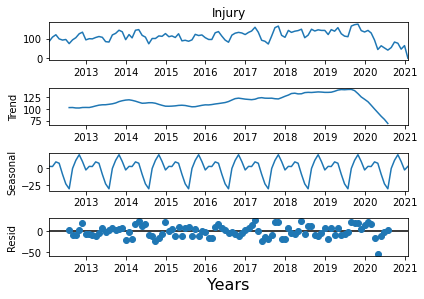

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose time series into trend, seasonal, and residual components.
decomp = seasonal_decompose(df_month['Injury'])

# Plot the decomposed time series.
decomp.plot()
plt.xlabel("Years",fontsize=16);

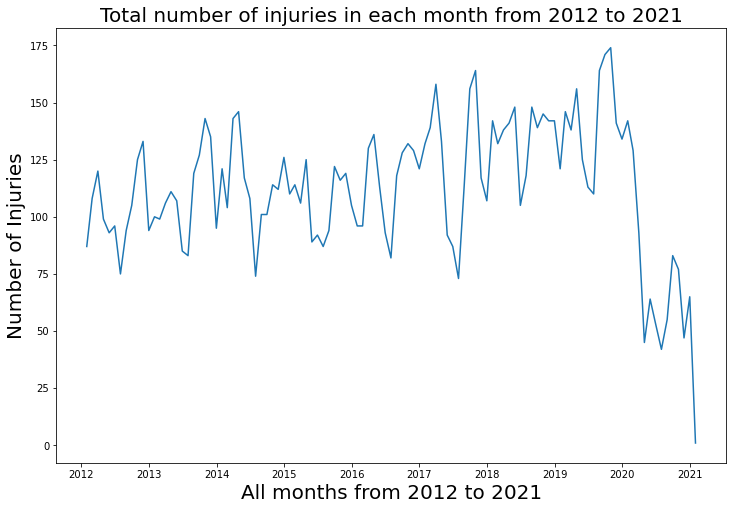

In [38]:
plt.figure(figsize=(12,8))
plt.title('Total number of injuries in each month from 2012 to 2021',fontsize=20)
plt.xlabel('All months from 2012 to 2021',fontsize=20)
plt.ylabel("Number of Injuries", fontsize = 20)
plt.plot(df_month['Injury']);

- From the above graph we can see that there is no trend, although it shows some sort of upward trend but I think the number of vehicles on the streets have also increased over time.
- We can also see a drop in injuries around the start of 2020 because I think the lockdown (due to covid) was in affect and most of the people stayed at home, leading to less crashes.
- Thus, according to me 'Injury' is stationary.
- We can similarly draw a **'weekly vs number of injuries'** and **'yearly vs number of injuries'** graph.

In [39]:
df.groupby('Injury').mean().T

Injury,0,1
Year,2015.896179,2016.045106
Distance,4.758405,1.618886
Total_Fatalities,0.002383,0.003263
Age_Drv1,36.022214,35.003035
Age_Drv2,37.559562,37.809170
Latitude,33.397834,33.397249
Longitude,-111.932642,-111.932294


In [40]:
# Converting as many categorial features to numericx as possible, and getting rid of outliers too
df['Not_Clear_Weather'] = df['Weather'].map({'Clear':0,'Cloudy':1,'Rain':1,'Unknown':1,
                                             'Blowing Sand Soil Dirt': 1,'Fog Smog Smoke': 1,'Other': 1,
                                              'Sleet Hail Freezing Rain Or Drizzle': 1,'Severe Crosswinds': 1})
df.drop(columns='Weather',axis=1,inplace=True)

df['Not_Dry_Surface'] = df['Surface_Condition'].map({'Dry':0, 'Wet':1,'Unknown':0,'Mud Dirt Gravel':1,
                                                    'Water Standing Moving':1, 'Other':1,'Oil':1,'Ice Frost':1})
df.drop(columns='Surface_Condition',axis=1,inplace=True)

df['Low_Light_Condition'] = df['Light_Condition'].map({'Daylight':0,'Dark Lighted':0,'Dusk':1,'Dawn':1,'Dark Not Lighted':1,
                                                       'Dark Unknown Lighting':0,'Unknown 51':0,'51':0})
df.drop(columns='Light_Condition',axis=1,inplace=True)
df['Injury_Severity'] = df['Injury_Severity'].map({'No Injury':0, 'Possible Injury':1, 'Non Incapacitating Injury':0,
                                                  'Suspected Minor Injury':1, 'Incapacitating Injury':1,
                                                  'Suspected Serious Injury':1,'Fatal':1 })

df['DrugUse_Drv1'] = df['DrugUse_Drv1'].map({'No Apparent Influence':0,'Drugs':1 })
df['DrugUse_Drv2'] = df['DrugUse_Drv2'].map({'No Apparent Influence':0,'Unknown':0,'Drugs':1 })

df['AlcoholUse_Drv1'] = df['AlcoholUse_Drv1'].map({'No Apparent Influence':0,'Alcohol':1 })
df['AlcoholUse_Drv2'] = df['AlcoholUse_Drv2'].map({'No Apparent Influence':0,'Unknown':0,'Alcohol':1 })

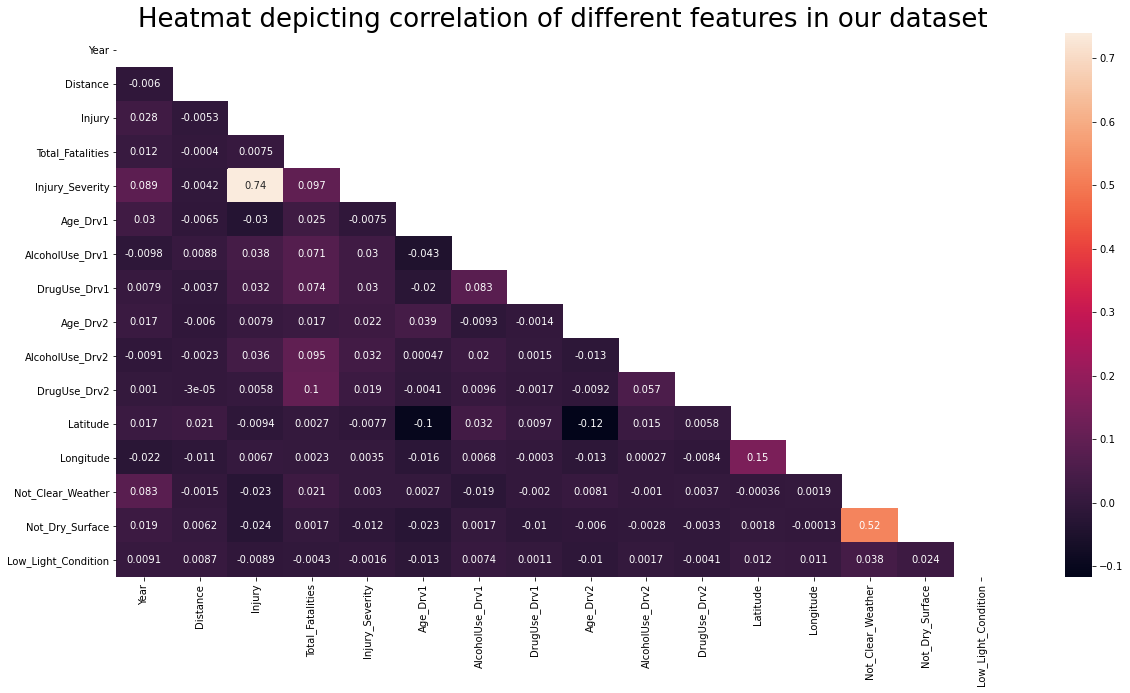

In [41]:
#heatmap of all features to check correlation with 'Totalinjuries'
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(20,10))
plt.title("Heatmat depicting correlation of different features in our dataset", fontsize=26)
sns.heatmap(data=df.corr(),annot=True,mask=mask);

- From the above **Heatmap** we can see that 'Injury_Severity' is the most strongly positive correlated with **Total_Injuries. Alcohol & Drug_Use** among both drivers are also somewhat positive correlated to **Total_Injuries**, and **Age_Drv1** is the highest negatively correlated feature to **Total_Injuries**.


In [42]:
# Converting df.dtypes into a dictionary so that I can implement the following function on it
df_dict=dict(df.dtypes)

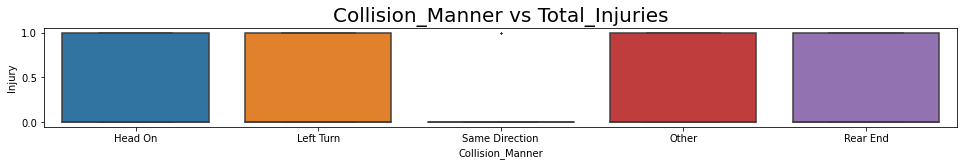

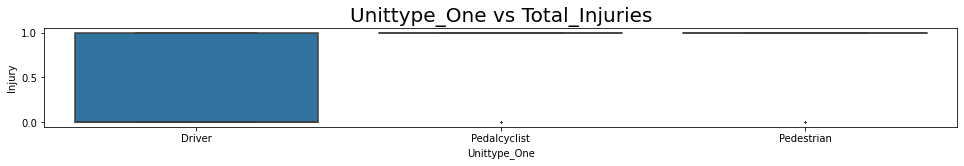

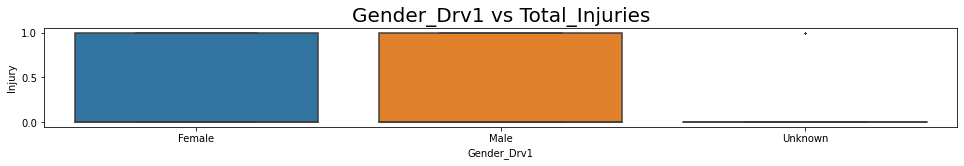

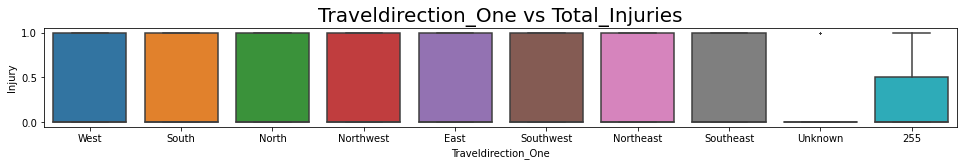

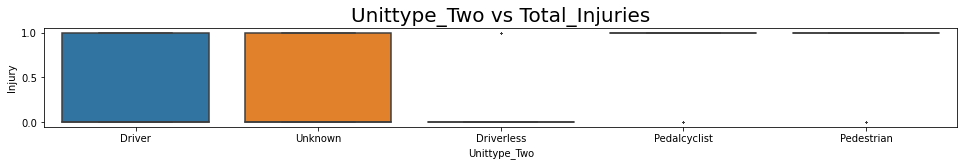

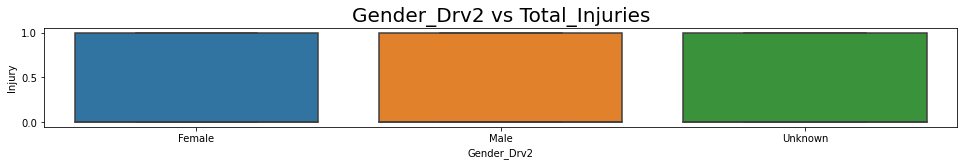

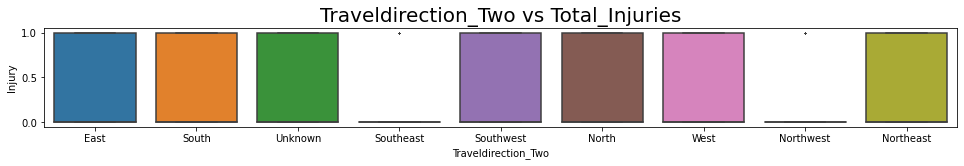

In [43]:
# This is a function that creates boxplot of almost all the categorical features (where .nunique()<=10) in our dataset with respect to Total_Injuries
for keys,values in df_dict.items():
    num=1
    if values=='object' and keys!='Street_Name' and keys!='Cross_Street'and keys!='Junction_Relation'and keys!='Unit_Action_One'and keys!='Violation1_Drv1'and keys!='Unit_Action_Two'and keys!='Violation1_Drv2':
        # could have also used If df["different features"].nunique()<15
        plt.figure(figsize=(36, 4))
        plt.subplot(2, 2, num)
        plt.title(f"{keys} vs Total_Injuries", fontsize=20)
        sns.boxplot(x=f'{keys}', y="Injury", data=df,fliersize=0.5)
        num+=1;

- **From the above output we can conclude the following:**
1. Front to side, left-turn, single vehicle, head on, and rear end were the different collision manners which increases the chance of injury in a crash.
4. Most of the collisions were vehicle to vehicle (UnitTyoe_one/two, very few crash reports on vehicle to pedestrain/bicycle).
5. Gender of drivers and Travelling direction does not affects the number of Total injuries.

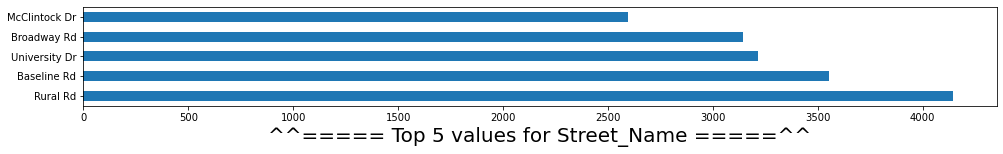

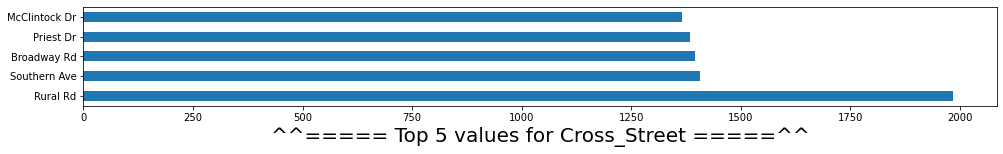

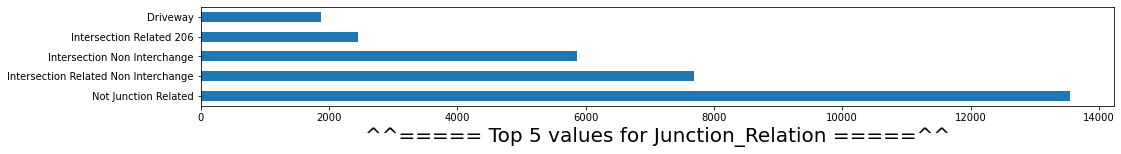

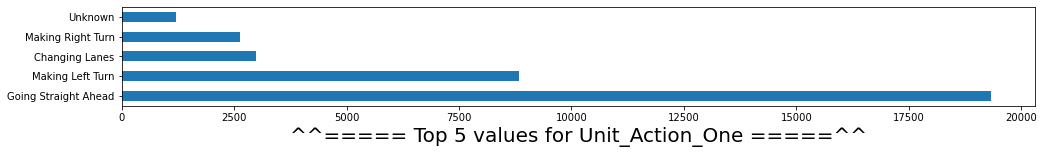

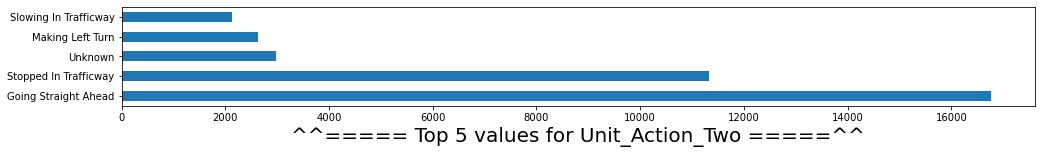

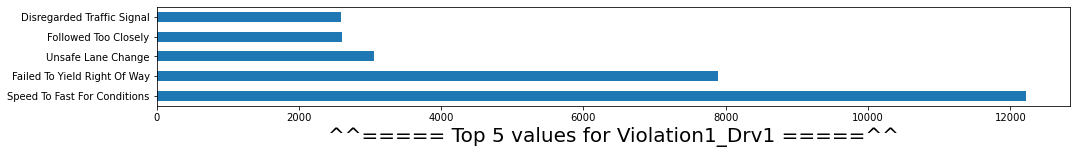

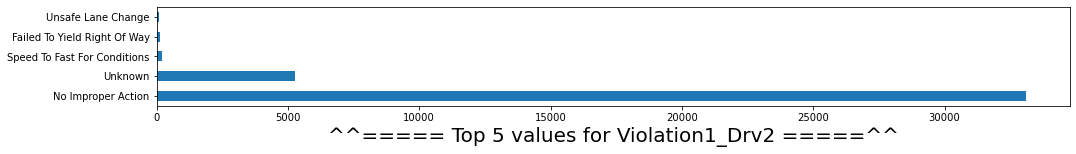

In [44]:
# This loop will print the top 5 values of all those features which we have not covered in the heatmap and boxplot used above
num=1
for i in ['Street_Name','Cross_Street','Junction_Relation','Unit_Action_One', 'Unit_Action_Two','Violation1_Drv1','Violation1_Drv2']:
    plt.figure(figsize=(36, 4))
    plt.subplot(2, 2, num+1)
    df[f'{i}'].value_counts()[0:5].plot(kind='barh')
    plt.xlabel(f'^^===== Top 5 values for {i} =====^^',fontsize=20)

- **From the above output we can conclude the following:**
1. Rural Rd (4145), Baseline Rd (3554), University Dr (3217), Broadway Rd (3142), & McClintock Dr (2594) are the top 5 roads in Tempe where most of the crashes occured from 2012 to 2021.
2. Rural Rd (1984), Southern Ave (1406), Broadway Rd (1395), Priest Dr (1384), McClintock Dr (1365) are the top 5 nearest intersecting streets/roads in Tempe where most of the crashes occured from 2012 to 2021.
3. Going Straight Ahead, Making Left Turn, Changing Lanes, Making Right Turn, and Slowing In Trafficway were the top 5 last actions that the drivers performed right before the crash.
4. Speed To Fast For Conditions, Failed To Yield Right Of Way, Unsafe Lane Change, Followed Too Closely, Disregarded Traffic Signal, No Improper Action were some of the main reasons that contributed in the crashes.

### Forcasting Injuries:

In [45]:
df_month.head(3)

,Year,Distance,Injury,Total_Fatalities,Age_Drv1,Age_Drv2,Latitude,Longitude
DateTime,,,,,,,,
2012-01-31 00:00:00+00:00,663960,-2384.976,87,1,11905.295958,12153.909652,11020.271806,-36936.846536
2012-02-29 00:00:00+00:00,698164,11260.128,108,0,12246.725554,12472.515675,11588.805327,-38840.273353
2012-03-31 00:00:00+00:00,736392,3021.216,120,0,12867.739896,13369.894594,12223.545801,-40967.646860


In [46]:
# Create a column called `lag_1` that lags total injuries by one month.
df_month['lag_1'] = df_month['Injury'].shift(1)

# Create a column called `lag_2` that lags total injuries by two months.
df_month['lag_2'] = df_month['Injury'].shift(2)

# Create a column called `seasonal_12` that lags total injuries by one year.
df_month['seasonal_12'] = df_month['Injury'].shift(12)

# Create a variable called `time` that takes on a value of 0 in January 2012,
# then increases by 1 each month until the end of the dataframe.
df_month['time'] = range(0, df_month.shape[0])

In [47]:
df_month.head(3)

,Year,Distance,Injury,Total_Fatalities,Age_Drv1,Age_Drv2,Latitude,Longitude,lag_1,lag_2,seasonal_12,time
DateTime,,,,,,,,,,,,
2012-01-31 00:00:00+00:00,663960,-2384.976,87,1,11905.295958,12153.909652,11020.271806,-36936.846536,NaN,NaN,NaN,0
2012-02-29 00:00:00+00:00,698164,11260.128,108,0,12246.725554,12472.515675,11588.805327,-38840.273353,87.0,NaN,NaN,1
2012-03-31 00:00:00+00:00,736392,3021.216,120,0,12867.739896,13369.894594,12223.545801,-40967.646860,108.0,87.0,NaN,2


In [48]:
df_month.shape

(109, 12)

In [49]:
# Dropping months from October 2019 to 2021 bcoz after that covid lockdown was in affect
df_month.drop(df_month.tail(16).index, inplace = True)

In [50]:
df_month.shape

(93, 12)

In [51]:
features_month = ['lag_1','lag_2','seasonal_12','time']
X = df_month[features_month]
y = df_month['Injury']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)

In [53]:
# Check shape to confirm we did this properly.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(74, 4)
(19, 4)
(74,)
(19,)


In [54]:
# Import statsmodels.
import statsmodels.api as sm

In [55]:
# Adding intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Confirming
X_train.head()

,const,lag_1,lag_2,seasonal_12,time
DateTime,,,,,
2012-01-31 00:00:00+00:00,1.0,NaN,NaN,NaN,0
2012-02-29 00:00:00+00:00,1.0,87.0,NaN,NaN,1
2012-03-31 00:00:00+00:00,1.0,108.0,87.0,NaN,2
2012-04-30 00:00:00+00:00,1.0,120.0,108.0,NaN,3
2012-05-31 00:00:00+00:00,1.0,99.0,120.0,NaN,4


In [56]:
# statsmodels won't be able to handle missing values so we have to remove them

X_train.dropna(inplace=True)
X_test.dropna(inplace=True)
y_train = y_train[X_train.index] 

# This way we subset y_train to keep only indices from X_train.

In [57]:
# Remember that, in statsmodels, we pass our data in when we instantiate the model!

lm = sm.OLS(y_train, X_train)
lm_results = lm.fit()

In [58]:
# Generate predicted test values.
lm_results.predict(X_test)

DateTime
2018-03-31 00:00:00+00:00    135.382217
2018-04-30 00:00:00+00:00    132.338506
2018-05-31 00:00:00+00:00    118.349536
2018-06-30 00:00:00+00:00    119.266339
2018-07-31 00:00:00+00:00     92.718110
2018-08-31 00:00:00+00:00    123.875327
2018-09-30 00:00:00+00:00    149.006313
2018-10-31 00:00:00+00:00    139.971737
2018-11-30 00:00:00+00:00    129.174752
2018-12-31 00:00:00+00:00    122.945620
2019-01-31 00:00:00+00:00    135.755687
2019-02-28 00:00:00+00:00    122.645147
2019-03-31 00:00:00+00:00    141.860745
2019-04-30 00:00:00+00:00    132.867756
2019-05-31 00:00:00+00:00    145.828568
2019-06-30 00:00:00+00:00    112.195342
2019-07-31 00:00:00+00:00    119.054997
2019-08-31 00:00:00+00:00    131.059101
2019-09-30 00:00:00+00:00    154.119219
Freq: M, dtype: float64

In [59]:
# Import R2 score and MSE.
from sklearn.metrics import r2_score, mean_squared_error
print('R2_score: ',r2_score(y_test, lm_results.predict(X_test)))
print('RMSE: ',mean_squared_error(y_test, lm_results.predict(X_test)) ** 0.5)

R2_score:  -0.07699550534046429
RMSE:  18.120083999345926


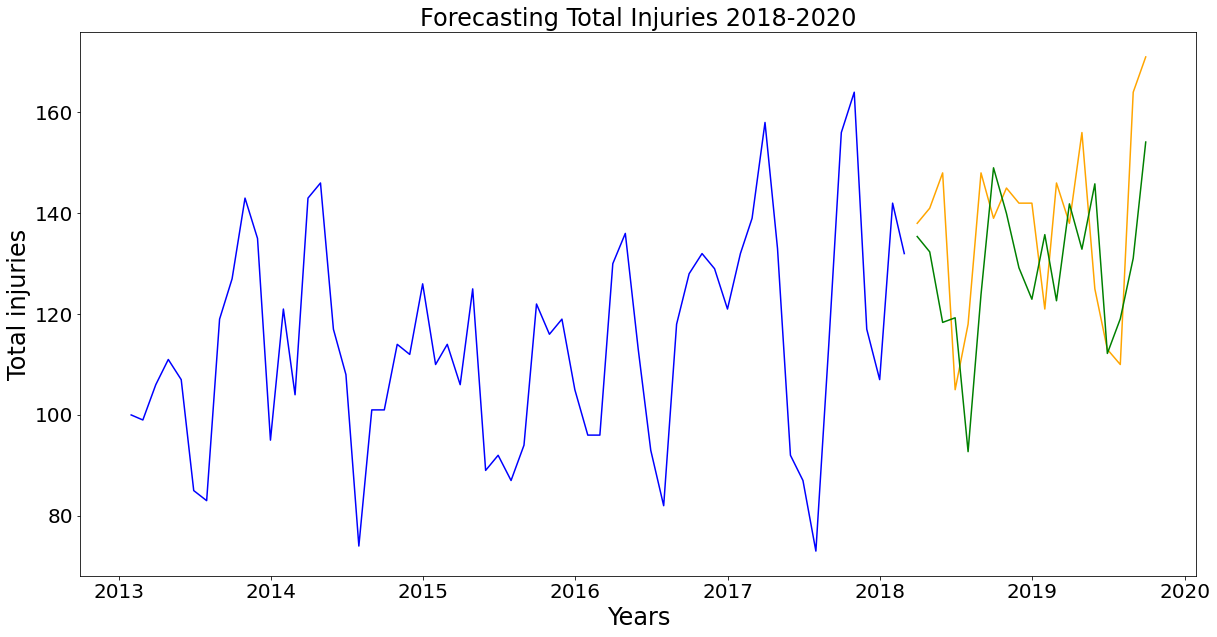

In [60]:
# Let's plot our predictions! 
plt.figure(figsize=(20,10))

# Plot training data.
plt.plot(y_train.index, y_train.values, color = 'blue')

# Plot testing data.
plt.plot(y_test.index, y_test.values, color = 'orange')

# Plot predicted test values.
plt.plot(lm_results.predict(X_test), color = 'green')

# Set label.
plt.title(label = 'Forecasting Total Injuries 2018-2020', fontsize=24)
plt.ylabel('Total injuries', fontsize=24)
plt.xlabel('Years',fontsize=24)

# Resize tick marks.
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

- From the above graph we can see that our forecasting of Total_Injuries turns out to be great.

#### Setting up X and y: 

In [61]:
#Doing a gtt dummies on Collision_Manner coz we saw earlier that different types of collision manners affects injury in a crash
df_Collision_Dummy = pd.get_dummies(df['Collision_Manner'])
df_Collision_Dummy.rename(columns = {'Head On':'Head_On','Left Turn':'Left_Turn','Other':'Other',
                                    'Rear End':'Rear_End','Same Direction':'Same_Direction'},inplace = True)
df_Collision_Dummy.sample(3)

,Head_On,Left_Turn,Other,Rear_End,Same_Direction
DateTime,,,,,
2016-06-28 19:28:00+00:00,0,0,0,1,0
2014-04-08 16:57:00+00:00,0,0,1,0,0
2016-01-19 23:43:00+00:00,0,0,0,1,0


In [62]:
# adding dummy features to the main df
df = pd.concat([df,df_Collision_Dummy],axis=1)
df.head(3)

,Year,Street_Name,Cross_Street,Distance,Junction_Relation,Injury,Total_Fatalities,Injury_Severity,Collision_Manner,Unittype_One,...,Latitude,Longitude,Not_Clear_Weather,Not_Dry_Surface,Low_Light_Condition,Head_On,Left_Turn,Other,Rear_End,Same_Direction
DateTime,,,,,,,,,,,,,,,,,,,,,
2012-01-01 07:25:00+00:00,2012,University Dr,Hardy Dr,0.000,Intersection Non Interchange,1,0,0,Head On,Driver,...,33.421907,-111.952212,0,0,0,1,0,0,0,0
2012-01-01 18:07:00+00:00,2012,Price Rd,Orange St,0.000,Intersection Interchange,0,0,0,Left Turn,Driver,...,33.418419,-111.891958,0,0,0,0,1,0,0,0
2012-01-02 00:12:00+00:00,2012,Rural Rd,Elliot Rd,135.168,Intersection Related Non Interchange,1,0,1,Same Direction,Driver,...,33.349556,-111.928474,0,0,1,0,0,0,0,1


In [63]:
features = ['Injury_Severity','AlcoholUse_Drv1','AlcoholUse_Drv2','Age_Drv1','DrugUse_Drv1','Head_On','Left_Turn',
            'Other','Rear_End','Same_Direction','Not_Clear_Weather','Not_Dry_Surface']
X = df[features]
y = df['Injury']

## **Modeling:** 

In [64]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

#### Logistic Model:

In [65]:
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train,y_train)
print('Logistic model R_2 score on train set: ',logreg.score(X_train,y_train))
print('Logistic model R_2 score on test set: ',logreg.score(X_test,y_test))

Logistic model R_2 score on train set:  0.886960968126811
Logistic model R_2 score on test set:  0.8867982411289498


Logistic Model accuracy score:  0.8867982411289498


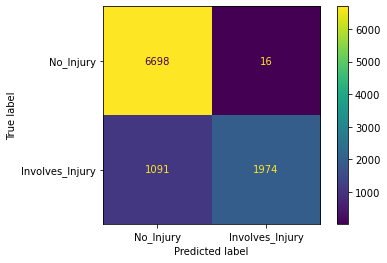

In [66]:
y_preds = logreg.predict(X_test)
logistic_cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(logistic_cm, display_labels=['No_Injury', 'Involves_Injury']);
disp.plot()
print('Logistic Model accuracy score: ',accuracy_score(y_test,y_preds));

In [67]:
#GridSearch on Logistic
logreg_params = {'penalty': ['l1', 'l2'],
                  'C': [1.0, 0.5, 0.1]}
logreg_gridsearch = GridSearchCV(LogisticRegression(max_iter=500), logreg_params, cv=5, verbose=1)
logreg_gridsearch.fit(X_train, y_train)
print('Logistic gridsearch best params: ',logreg_gridsearch.best_params_)
print('Logistic gridsearch best score: ',logreg_gridsearch.best_score_)
print('Logistic gridsearch train score: ',logreg_gridsearch.score(X_train, y_train))
print('Logistic gridsearch test score: ',logreg_gridsearch.score(X_test, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Logistic gridsearch best params:  {'C': 1.0, 'penalty': 'l2'}
Logistic gridsearch best score:  0.8869609681268109
Logistic gridsearch train score:  0.886960968126811
Logistic gridsearch test score:  0.8867982411289498


In [68]:
# Scaling features is required for models like KNN and SVM
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

#### Regularization on Logistic Model (Ridge & Lasso):

In [69]:
# Ridge
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=10) 
ridge_model.fit(X_train, y_train)
print('Ridge train score: ',ridge_model.score(X_train, y_train))
print('Ridge test score: ',ridge_model.score(X_test, y_test))

# Lasso
from sklearn.linear_model import Lasso, LassoCV
lasso_model = Lasso(alpha = 0.001)
lasso_model.fit(X_train, y_train)
print('Lasso train score: ',lasso_model.score(X_train, y_train))
print('Lasso test score: ',lasso_model.score(X_test, y_test))

Ridge train score:  0.5641337738352808
Ridge test score:  0.5635932992365927
Lasso train score:  0.5637142357586296
Lasso test score:  0.5635729494885615


#### Principal Component Analysis on Logistic Model:

In [70]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 3)

# Fit and transform our X data using Polynomial Features
X_new = pf.fit_transform(X)
print('New X shape after Polynomial Feature: ',X_new.shape)
print('Old X shape before Polynomial Feature: ',X.shape)

# Train/test split our data.
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_new, y, test_size = 0.33, random_state = 42)

New X shape after Polynomial Feature:  (39114, 455)
Old X shape before Polynomial Feature:  (39114, 12)


In [71]:
# Instantiate our StandardScaler for PCA
ss = StandardScaler()

# Standardize X_train.
X_train_pca = ss.fit_transform(X_train_pca)

# Standardize X_test.
X_test_pca = ss.transform(X_test_pca)

In [72]:
from sklearn.decomposition import PCA

# Instantiate PCA
pca = PCA(random_state = 42)

# Fit PCA on the training data.
pca.fit(X_train_pca)

# Transform PCA on the training data
Z_train_pca = pca.transform(X_train_pca)

# Don't forget to transform the test data!
Z_test_pca = pca.transform(X_test_pca)

# Fit Logistic Model on train_pca data
logreg.fit(Z_train_pca, y_train_pca)

# Score on training and testing sets.
print(f'Logistic PCA Training Score: {logreg.score(Z_train_pca, y_train_pca)}')
print(f'Logistic PCA Testing Score: {logreg.score(Z_test_pca, y_test_pca)}')

Logistic PCA Training Score: 0.8887277722658933
Logistic PCA Testing Score: 0.8837929965912612


#### KNN (K-Nearest Neighbor) with pipeline and GridSearch:

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

#Pipeline
pipe = Pipeline([ ('sc', StandardScaler()),
                 ('knn', KNeighborsClassifier()) ])
#Parameters grid
knn_params = {'n_neighbors': range(1, 51, 10),
              'metric': ['euclidean', 'manhattan']}

# Instantiate our GridSearchCV object.
knn_gridsearch = GridSearchCV(KNeighborsClassifier(), # What is the model we want to fit?
                              knn_params, # What is the dictionary of hyperparameters?
                              cv=5, # What number of folds in CV will we use?
                              verbose=1)

# Fit the GridSearchCV object to the data
knn_gridsearch.fit(X_train, y_train)
print('KNN gridsearch best score: ',knn_gridsearch.best_score_ )
print('KNN gridsearch best parameters: ',knn_gridsearch.best_params_)
print('KNN gridsearch train score: ',knn_gridsearch.score(X_train, y_train))
print('KNN gridsearch test score: ',knn_gridsearch.score(X_test, y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
KNN gridsearch best score:  0.8747912050451678
KNN gridsearch best parameters:  {'metric': 'manhattan', 'n_neighbors': 11}
KNN gridsearch train score:  0.8795977501278337
KNN gridsearch test score:  0.874322527865835


KNN Gridsearch Model accuracy score:  0.874322527865835


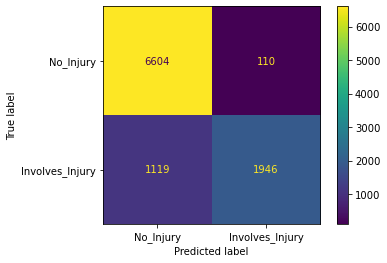

In [74]:
y_preds = knn_gridsearch.predict(X_test)
knn_cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(knn_cm, display_labels=['No_Injury', 'Involves_Injury']);
disp.plot()
print('KNN Gridsearch Model accuracy score: ',accuracy_score(y_test,y_preds));

#### SVM (Support Vector Machine):

In [75]:
%%time
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_sc, y_train)
print('Support Vector model R_2 score on train set: ',svc.score(X_train_sc, y_train))
print('Support Vector model R_2 score on train set: ',svc.score(X_test_sc,y_test))
svc_preds = svc.predict(X_test_sc)
print('SVM accuracy score: ,',accuracy_score(y_test,svc_preds))

#Pipeline
#pipe = Pipeline([ ('sc', StandardScaler()),
                 #('svc', SVC()) ])

#Parameters grid
#svc_params = {'C': [0.1,1,10], 'gamma': [1,0.1]}

# Instantiate our GridSearchCV object.
#svc_gridsearch = GridSearchCV(SVC(), # What is the model we want to fit?
                              #svc_params, # What is the dictionary of hyperparameters?
                              #cv=5, # What number of folds in CV will we use?
                              #verbose=1)
# Fit the GridSearchCV object to the data
#svc_gridsearch.fit(X_train, y_train)
#print('SVC gridsearch best score: ',svc_gridsearch.best_score_ )
#print('SVC gridsearch best parameters: ',svc_gridsearch.best_params_)
#print('SVC gridsearch train score: ',svc_gridsearch.score(X_train, y_train))
#print('SVC gridsearch test score: ',svc_gridsearch.score(X_test, y_test))

Support Vector model R_2 score on train set:  0.8873359468212033
Support Vector model R_2 score on train set:  0.8858779016259332
SVM accuracy score: , 0.8858779016259332
CPU times: user 51 s, sys: 198 ms, total: 51.1 s
Wall time: 51.2 s


- **Note:** I had to comment all the pipeline-gridsearch code as it was taking around 6 minutes to run, and gave me similar value to without gridsearch.

#### Decision Tree:

In [76]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(X_train, y_train)
print('Decision Tree model R_2 score on train set: ',dc.score(X_train,y_train))
print('Decision Tree model R_2 score on test set: ',dc.score(X_test,y_test))

Decision Tree model R_2 score on train set:  0.8923129367649565
Decision Tree model R_2 score on test set:  0.8820942836690868


In [77]:
dc_preds = dc.predict(X_test)
print('Decision Tree Model accuracy score: ,',accuracy_score(y_test,dc_preds))

Decision Tree Model accuracy score: , 0.8820942836690868


#### Bagging Classifier:

In [78]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
bc.fit(X_train, y_train)
print('Bagged Decision Tree model R_2 score on train set: ',bc.score(X_train,y_train))
print('Bagged Decision Tree model R_2 score on test set: ',bc.score(X_test,y_test))

Bagged Decision Tree model R_2 score on train set:  0.8919379580705642
Bagged Decision Tree model R_2 score on test set:  0.8809694242765109


#### Random Forest: 

In [79]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()
rc.fit(X_train, y_train)
print('Random Forest model R_2 score on train set: ',rc.score(X_train,y_train))
print('Random Forest Tree model R_2 score on test set: ',rc.score(X_test,y_test))

Random Forest model R_2 score on train set:  0.8923129367649565
Random Forest Tree model R_2 score on test set:  0.8807649043869517


#### Extra Tree:

In [80]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()
et.fit(X_train, y_train)
print('Extra Tree model R_2 score on train set: ',et.score(X_train,y_train))
print('Extra Tree model R_2 score on test set: ',et.score(X_test,y_test))

Extra Tree model R_2 score on train set:  0.8923129367649565
Extra Tree model R_2 score on test set:  0.8820942836690868


#### Naive Bayes (Bernoulli):

In [81]:
from sklearn.naive_bayes import BernoulliNB

bayes = BernoulliNB()
bayes.fit(X_train,y_train)
print('Naive Bayes (Bernoulli) train score: ',bayes.score(X_train,y_train))
print('Naive Bayes (Bernoulli) test score:  ',bayes.score(X_test,y_test))

Naive Bayes (Bernoulli) train score:  0.887097324015681
Naive Bayes (Bernoulli) test score:   0.8867982411289498


Bernoulli Naive Bayes Model accuracy score:  0.8867982411289498


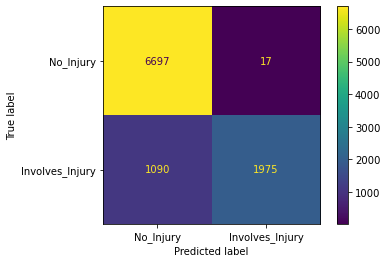

In [82]:
y_preds = bayes.predict(X_test)
bayes_cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(bayes_cm, display_labels=['No_Injury', 'Involves_Injury']);
disp.plot()
print('Bernoulli Naive Bayes Model accuracy score: ',accuracy_score(y_test,y_preds));

#### Ada Boosting:

In [83]:
from sklearn.ensemble import AdaBoostClassifier
ac = AdaBoostClassifier()
ac.fit(X_train, y_train)
print('Ada Boosting model R_2 score on train set: ',ac.score(X_train,y_train))
print('Ada Boosting Tree model R_2 score on test set: ',ac.score(X_test,y_test))

Ada Boosting model R_2 score on train set:  0.8876427475711607
Ada Boosting Tree model R_2 score on test set:  0.8874118007976276


Ada Boosting Model accuracy score:  0.8874118007976276


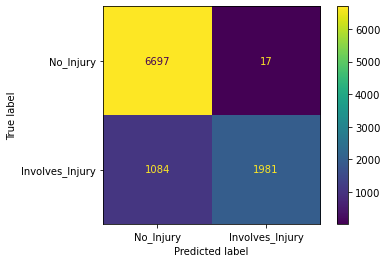

In [84]:
y_preds = ac.predict(X_test)
ac_cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(ac_cm, display_labels=['No_Injury', 'Involves_Injury']);
disp.plot()
print('Ada Boosting Model accuracy score: ',accuracy_score(y_test,y_preds));

- **Note:** I am comparing performance of all the models on the basis of **Accuracy score** (or the R_2 test score) because here we are trying to get right predictions as many as possible, so accuracy score is the best metric to compare all the models. 

In [85]:
# Saving our cleaned dataframe into a csv so that I can use it in Google Collab to run some deep learning models
df.to_csv('./Clean_dataframe/clean_df.csv')

#### Creating Pickle File for Streamlit:

In [87]:
import pickle
#Ada Boosting model had the highest accuracy (R_2 test score)
pickle.dump(ac,open('Best_model_Ada_Boosting.pkl','wb'))   